In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_csv("../P3_Weather.csv")
import os
os.stat("../P3_Weather.csv")

/home/vivek/miniconda3/envs/DSE/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


os.stat_result(st_mode=33279, st_ino=7868423, st_dev=2050, st_nlink=1, st_uid=1000, st_gid=1000, st_size=11237604, st_atime=1609000671, st_mtime=1571231954, st_ctime=1609087015)

In [5]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("max MaxTemp: ",df['MaxTemp'].max())
print("min MaxTemp: ",df['MaxTemp'].min())
print("max MinTemp: ",df['MinTemp'].max())
print("min MinTemp: ",df['MinTemp'].min())

max MaxTemp:  50.0
min MaxTemp:  -33.33333333
max MinTemp:  34.44444444
min MinTemp:  -38.33333333


Columns retained: Precip, MinTemp, MeanTemp, Snowfall and MaxTemp


In [8]:
colms = ['Precip','MinTemp','MeanTemp','Snowfall','MaxTemp']
df = df[colms]
df.head()

,Precip,MinTemp,MeanTemp,Snowfall,MaxTemp
0,1.016,22.222222,23.888889,0.0,25.555556
1,0,21.666667,25.555556,0.0,28.888889
2,2.54,22.222222,24.444444,0.0,26.111111
3,2.54,22.222222,24.444444,0.0,26.666667
4,0,21.666667,24.444444,0.0,26.666667


In [9]:
df.dtypes

Precip       object
MinTemp     float64
MeanTemp    float64
Snowfall     object
MaxTemp     float64
dtype: object

In [10]:
#Precip and Snowfall converted to numeric values
df['Precip']=pd.to_numeric(df['Precip'],errors='coerce')
df['Snowfall']=pd.to_numeric(df['Snowfall'],errors='coerce')

In [13]:
df.isnull().sum()

Precip      16753
MinTemp         0
MeanTemp        0
Snowfall     1207
MaxTemp         0
dtype: int64

In [14]:
df.shape

(119040, 5)

/home/vivek/miniconda3/envs/DSE/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'MaxTemp range')]

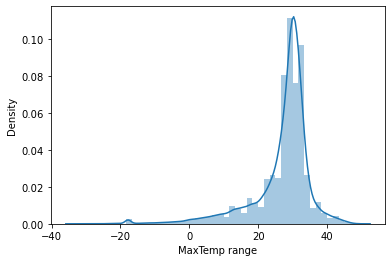

In [15]:
# plt.figure(figsize=(6,5))
pl = sns.distplot(df['MaxTemp'])
pl.set(xlabel = "MaxTemp range")

In [10]:
#filling missing values of snowfall and precip with 0 
df['Snowfall'] = df['Snowfall'].fillna(0)
df['Precip'] = df['Precip'].fillna(0)
df.isnull().sum() #no missing values now

Precip      0
MinTemp     0
MeanTemp    0
Snowfall    0
MaxTemp     0
dtype: int64

/home/vivek/miniconda3/envs/DSE/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Precipitation range')]

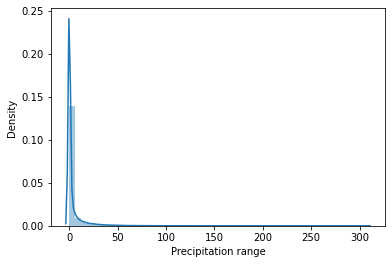

In [17]:
# plt.figure(figsize=(6,5))
pl = sns.distplot(df['Precip'])
pl.set(xlabel = "Precipitation range")

/home/vivek/miniconda3/envs/DSE/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Snowfall range')]

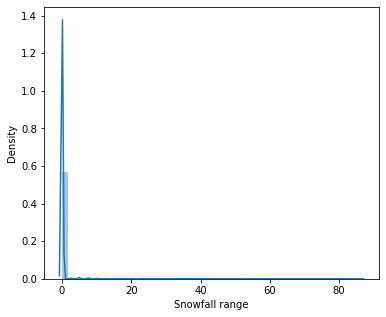

In [18]:
plt.figure(figsize=(6,5))
pl = sns.distplot(df['Snowfall'])
pl.set(xlabel = "Snowfall range")

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn
corr = df.corr()
print(corr)

            Precip   MinTemp  MeanTemp  Snowfall   MaxTemp
Precip    1.000000  0.098579  0.048346 -0.010480 -0.003083
MinTemp   0.098579  1.000000  0.965425 -0.320022  0.878384
MeanTemp  0.048346  0.965425  1.000000 -0.338234  0.969048
Snowfall -0.010480 -0.320022 -0.338234  1.000000 -0.336999
MaxTemp  -0.003083  0.878384  0.969048 -0.336999  1.000000


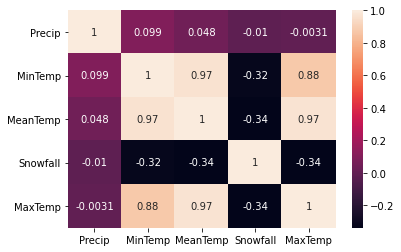

In [21]:
sn.heatmap(corr, annot=True)
plt.show()

# Simple linear regression

In [31]:
X=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1) #considering maxtemp as dependent variable


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred=regressor.predict(X_test)

In [36]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.92033997]]
[10.66185201]


In [37]:
X_test.size

23808

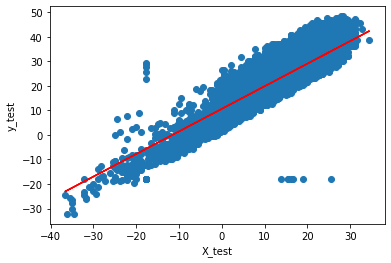

In [38]:
plt.scatter(X_test,y_test)
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.plot(X_test,y_pred,color='red')
plt.show()

In [39]:
import math
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = metrics.mean_absolute_error(y_test,y_pred)
print("Root Mean Squared Error : ",rmse)
print("Mean Absolute Error : ",mae)

Root Mean Squared Error :  4.198996082109204
Mean Absolute Error :  3.19932917837853


<AxesSubplot:>

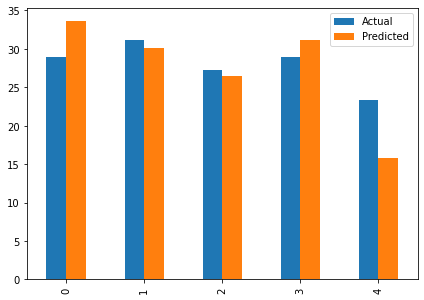

In [41]:
df_new=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df1=df_new.head(5)
df1.plot(kind='bar',figsize=(7,5))

In [43]:
# plt.grid(which='major',linewidth='0.5')
# plt.grid(which='minor',linewidth='0.5')
# plt.show()

#  Multiple Linear Regression

In [46]:
df.columns

Index(['Precip', 'MinTemp', 'MeanTemp', 'Snowfall', 'MaxTemp'], dtype='object')

In [51]:
df['Precip'] = df['Precip'].fillna(0)
df['Snowfall'] = df['Snowfall'].fillna(0)

In [52]:
df.isna().sum()

Precip      0
MinTemp     0
MeanTemp    0
Snowfall    0
MaxTemp     0
dtype: int64

In [53]:
X = df[['Precip','MinTemp','MeanTemp','Snowfall']] # here we have 4 variables for multiple regression
Y = df['MaxTemp']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# with sklearn
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred=regr.predict(X_test)


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.8201592893312721
Coefficients: 
 [-0.00403805 -0.87693399  1.86697036 -0.01595454]


In [54]:
import math
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = metrics.mean_absolute_error(y_test,y_pred)
print("Root Mean Squared Error : ",rmse)
print("Mean Absolute Error : ",mae)

Root Mean Squared Error :  0.949802083760172
Mean Absolute Error :  0.4001173532221174


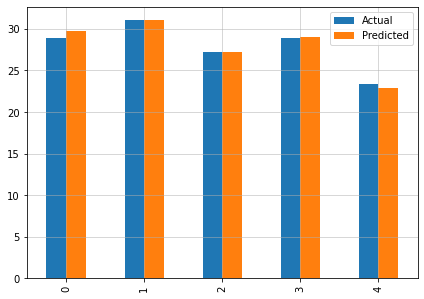

In [56]:
df_new2=pd.DataFrame({'Actual':y_test.values.flatten(),'Predicted':y_pred.flatten()})
df1=df_new2.head()
df1.plot(kind='bar',figsize=(7,5))

plt.grid(which='major',linewidth='0.5')
plt.grid(which='minor',linewidth='0.5')
plt.show()